**2. Build BDF and expand**

**BFS Algorithm:**

1. Starting point: Pick a starting node.
2. Queueing nodes: Enqueue the starting node and mark it as visited.
3. Exploring nodes: Dequeue a node, examine its unvisited neighbors, and enqueue them.
4. Expand: Repeat until all reachable nodes are explored.


In [1]:
import networkx as nx
import matplotlib as plt

In [2]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [3]:
print(graph)

{'A': {'C', 'B'}, 'B': {'A', 'D', 'E'}, 'C': {'A', 'F'}, 'D': {'B'}, 'E': {'B', 'F'}, 'F': {'C', 'E'}}


In [4]:
G = nx.Graph(graph)

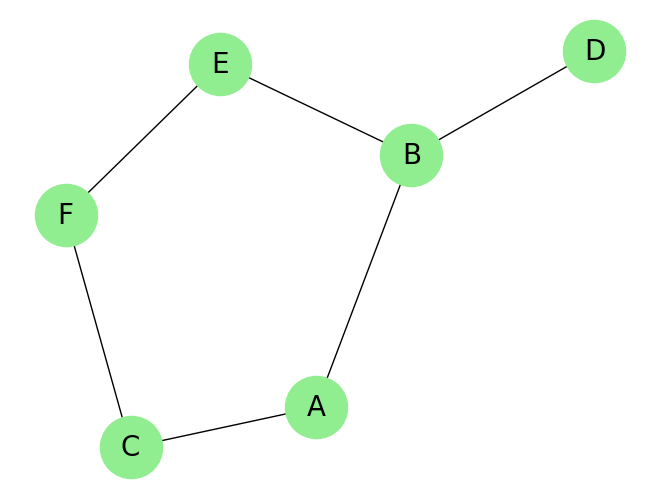

In [5]:
nx.draw(G, pos = None, ax = None, with_labels = True,font_size = 20, node_size = 2000, node_color = 'lightgreen')

**BEARTH FIRST ALGORITHM (BFT)**

In [6]:
def bfs(graph, start):
    # Initialize an empty set to keep track of visited vertices
    # Initialize the queue with the start vertex to begin the BFS
    visited, queue = set(), [start]

    # Loop while there are vertices to explore in the queue
    while queue:
        # Dequeue the first element (FIFO: First In, First Out)
        vertex = queue.pop(0)
        
        # Print the current vertex (for demonstration purposes)
        print(vertex)

        # If the vertex hasn't been visited yet
        if vertex not in visited:
            # Add the vertex to the visited set
            visited.add(vertex)
            
            # Add all unvisited neighbors of the current vertex to the end of the queue
            # 'graph[vertex]' gives the neighbors, and we subtract the visited ones
            queue.extend(graph[vertex] - visited)

    # Return the set of visited vertices after the traversal is complete
    return visited


In [7]:
bfs(graph, 'B')

B
A
D
E
C
F
F


{'A', 'B', 'C', 'D', 'E', 'F'}

---

In [8]:
class FIFOQueue:
    def __init__(self):
        self.queue = []
    
    def enqueue(self, item):
        self.queue.append(item)
    
    def dequeue(self):
        if not self.is_empty():
            return self.queue.pop(0)
        else:
            return None
    
    def is_empty(self):
        return len(self.queue) == 0

def bfs(graph, start_node):
    # Create a queue for BFS and a list to track visited nodes
    visited = set()
    queue = FIFOQueue()

    # Start by enqueuing the starting node and marking it as visited
    queue.enqueue(start_node)
    visited.add(start_node)

    # List to store the order of nodes visited in BFS
    bfs_order = []

    while not queue.is_empty():
        # Dequeue a vertex from the queue
        current_node = queue.dequeue()
        bfs_order.append(current_node)
        print(f"Visiting node: {current_node}")

        # Explore neighbors of the current node
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                queue.enqueue(neighbor)
                visited.add(neighbor)
    
    return bfs_order

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Running BFS starting from node 'A'
bfs_result = bfs(graph, 'A')
print(f"BFS traversal order: {bfs_result}")


Visiting node: A
Visiting node: B
Visiting node: C
Visiting node: D
Visiting node: E
Visiting node: F
BFS traversal order: ['A', 'B', 'C', 'D', 'E', 'F']
